#### Install library if not installed

In [ ]:
# ! pip install "numpy<2"
# ! pip install catboost
# ! pip install scikit-learn

#### Import Dependency

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)

#### Read dataset

In [2]:
df = pd.read_csv("/data/ksa/00_Data_Input/relabelled_data_ksa_explore.csv")

## Backscatter

In [3]:
X = df.loc[:,'VH_0':'VH_30']
y = df.observation

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

In [8]:
model = CatBoostClassifier(
    loss_function='MultiClass',
    verbose = 0
)

In [9]:
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=8)
# grid_search.fit(X_train, y_train)

/data/home/fawcet.makay/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/data/home/fawcet.makay/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0b97a08580>,
             n_jobs=8,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [10]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

Best Parameters: {'border_count': 128, 'depth': 4, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.05}


In [17]:
model = CatBoostClassifier(
    border_count = 128, 
    depth = 4,
    iterations = 300, 
    l2_leaf_reg = 1, 
    learning_rate = 0.05,
    loss_function='MultiClass',
    verbose = 0
)

In [20]:
train_data = Pool(data=X_train, label=y_train)

In [21]:
model.fit(train_data)

In [22]:
predictions = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5841


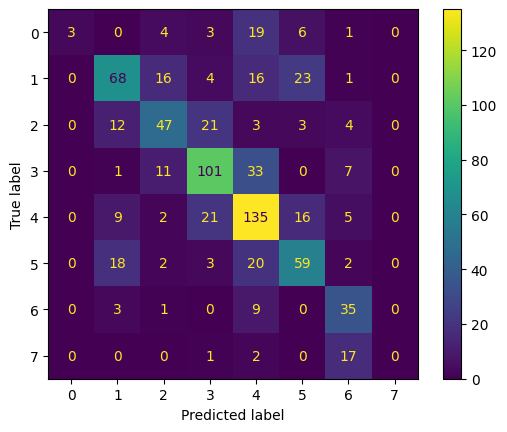

In [28]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()

## Ready Feature

In [33]:
X = df.loc[:,'F1':'F17']
y = df.observation

In [42]:
X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)

for column in X.columns:  # Add your specific columns here
    X[column] = X[column].astype(float)

/tmp/ipykernel_1197583/1889658283.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
model = CatBoostClassifier(
    border_count = 128, 
    depth = 4,
    iterations = 300, 
    l2_leaf_reg = 1, 
    learning_rate = 0.05,
    loss_function='MultiClass',
    verbose = 0
)

In [47]:
train_data = Pool(data=X_train, label=y_train)

In [48]:
model.fit(train_data)

In [49]:
predictions = model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.5671


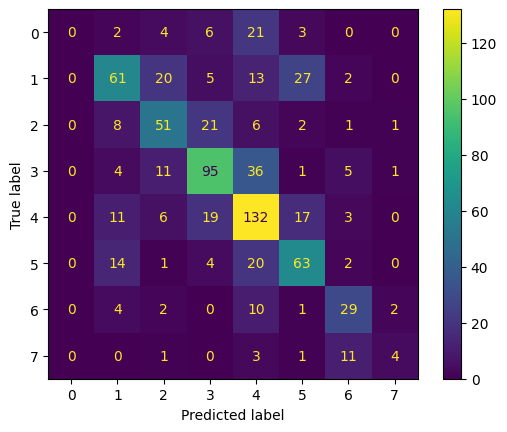

In [51]:
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()